In [2]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pl

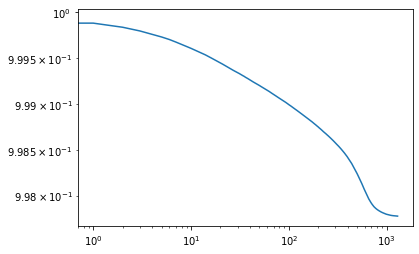

In [30]:
size, amount = np.loadtxt("3D_data.txt", skiprows=1, unpack=True)
pdf = []
for i in amount[1:]:
    if i != 0:
        pdf.append(i/np.sum(amount))
cdf = np.cumsum(pdf)
ccdf = 1-cdf
plt.xscale('log')
plt.yscale('log')
plt.plot(size[:len(pdf)], ccdf)

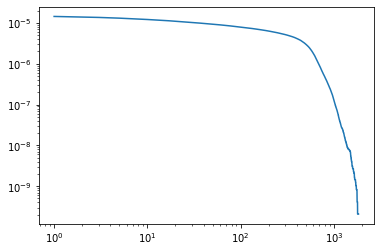

In [32]:
size, amount = np.loadtxt("3D_data.txt", skiprows=2, unpack=True)
list = np.zeros(len(size))
j = 0
for i in range(len(amount)):
    list[i] = np.sum(amount[i:])/np.sum(amount)
    if list[i] == 0:
        j = i
        break

list = list/np.sum(amount)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(size[:j], list[:j])

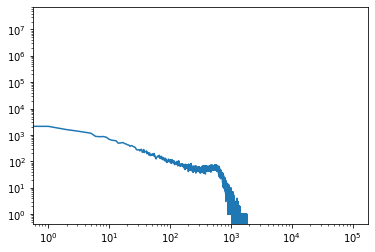

In [26]:
size, amount = np.loadtxt("3D_data.txt" , skiprows=1, unpack=True)
plt.loglog(size, amount)

In [40]:
a, m = 3., 2.  

s = (np.random.pareto(a, 10000000) + 1) * m


size, bins= np.histogram(s, 1000, density=True)
fit = a*m**a / bins**(a+1)

list = np.zeros(len(size))
j = 0
for i in range(len(amount)):
    list[i] = np.sum(amount[i:])/np.sum(amount)
    if list[i] == 0:
        j = i
        break

list = list/np.sum(amount)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(size[:j], list[:j])

NameError: name 'amount' is not defined